##Artificial Neural Networks Assignment
Dataset = Mobile_price_classification
https://drive.google.com/file/d/1YNuSslEtvOXx3_whqdY54ZqIuBGvRUvd/view

Bob has started his own mobile company. He wants to give tough fight to big companies
like Apple, Samsung etc. He does not know how to estimate price of mobiles his company
creates. In this competitive mobile phone market, you cannot simply assume things. To
solve this problem, he collects sales data of mobile phones of various companies. Bob
wants to find out some relation between features of a mobile phone (eg:- RAM, Internal
Memory etc) and its selling price. But he is not so good at Machine Learning. Create an
artificial neural network-based classifier to help Bob. Data and class labels are available
in mobile_price_classification.csv file. Use price_range column as label and remaining
columns as data.
Also do the hyperparmeter tuning.

In [182]:
#step 1:Importing required libraries
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [183]:
# Step 2: Load the dataset
mobile_price = pd.read_csv('/content/mobile_price_classification.csv')
mobile_price.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [184]:
# Display the column in a Mobile_price dataset
mobile_price.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [185]:
# display the statistical information of the data set
mobile_price.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [186]:
# Shape of the dataset

mobile_price.shape

(2000, 21)

In [187]:
# Display the general information about the data
mobile_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

**PREPROCESSING**
1. Missing Value Handiling
2. Outlier Detection

1. Scaling
2. Encoding





In [188]:
#Step 1: Missing values handiling

     # Checking the missing values in a dataset Mobile_price
mobile_price.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


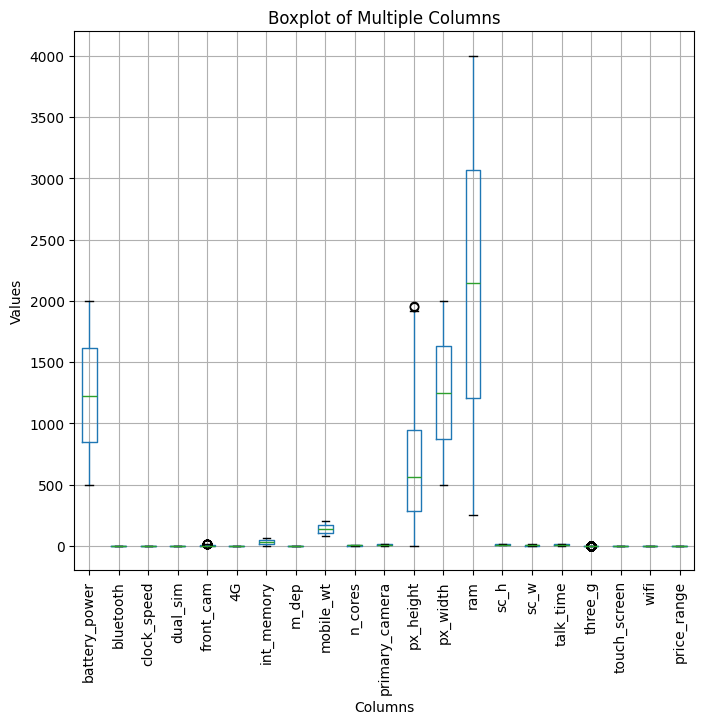

In [189]:
# Step 2: Outlier detection
    # checking outlier in the dataset mobile_price
# Boxplot
plt.figure(figsize=(8,7))
mobile_price.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [190]:
# this plot have only 3 outlier labels
# front_cam
# three_g
# px_height


Text(0.5, 1.0, 'Boxplot of front_cam')

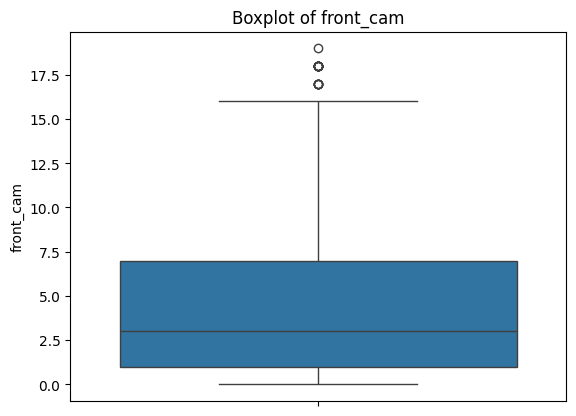

In [191]:
# Boxplot of front_cam
sns.boxplot(y=mobile_price['front_cam'],data=mobile_price)
plt.title('Boxplot of front_cam')

Text(0.5, 1.0, 'Boxplot of three_g')

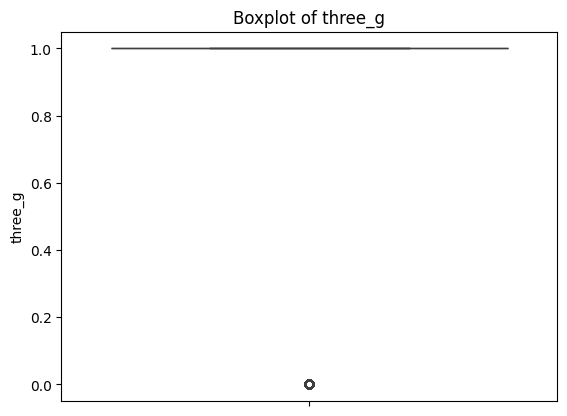

In [192]:
# Boxplot of three_g
sns.boxplot(y=mobile_price['three_g'],data=mobile_price)
plt.title('Boxplot of three_g')

Text(0.5, 1.0, 'Boxplot of px_height')

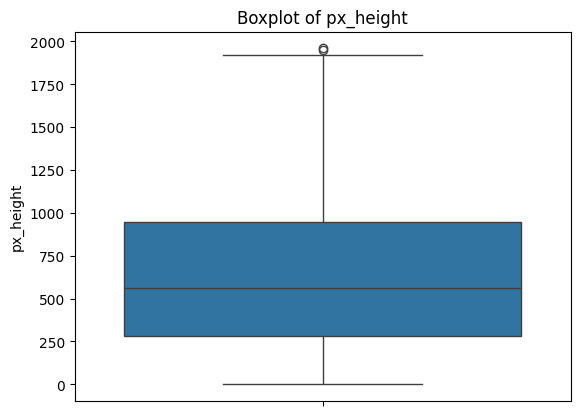

In [193]:
# Boxplot of px_height
sns.boxplot(y=mobile_price['px_height'],data=mobile_price)
plt.title('Boxplot of px_height')

In [194]:
# Outlier Treatment to the columns :
# front_cam
# three_g
# px_height
oulier= ['front_cam','three_g','px_height']
for column in oulier:
    Q1 = mobile_price[column].quantile(0.25)
    Q3 = mobile_price[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mobile_price[column] = np.where(mobile_price[column] < lower_bound, lower_bound, mobile_price[column])
    mobile_price[column] = np.where(mobile_price[column] > upper_bound, upper_bound, mobile_price[column])



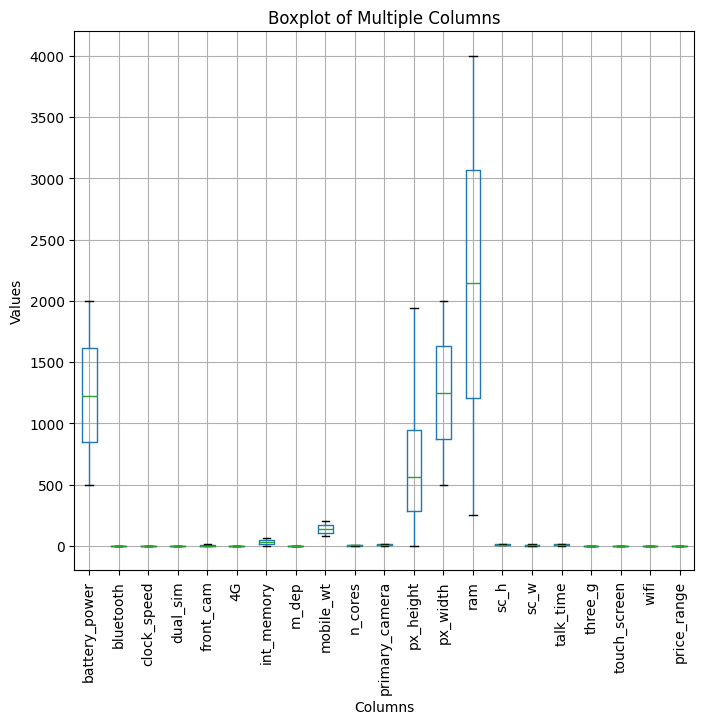

In [195]:
# Boxplot
plt.figure(figsize=(8,7))
mobile_price.boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

In [196]:
# Split the dataset into features and target
X=mobile_price.values[:,:-1] #  Features split using slicing
y=mobile_price['price_range'] # Target
print(y.shape,X.shape)

(2000,) (2000, 20)


In [197]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [198]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MODEL DEVELOPMENT**

In [199]:
n_features=X_train.shape[1]
model=Sequential()
#Layer 1:Input+Hidden
model.add(Dense(16,input_shape=(n_features,),activation='relu'))#we start the neurons 16.beauce of multiple of 2
#Layer 2:Hidden
model.add(Dense(12,activation='relu'))
#Layer 3:Hidden
model.add(Dense(8,activation='relu'))
#Layer 4:Output Layer 4 classes
model.add(Dense(4,activation='softmax'))#softmax=multi class classifier

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [200]:
#step 4:compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [201]:
#step 5:Train the model
history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=50,
    verbose=1
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2499 - loss: 1.4917 - val_accuracy: 0.2375 - val_loss: 1.4338
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2329 - loss: 1.4275 - val_accuracy: 0.2062 - val_loss: 1.4080
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2335 - loss: 1.4009 - val_accuracy: 0.2375 - val_loss: 1.3991
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2625 - loss: 1.3796 - val_accuracy: 0.2531 - val_loss: 1.3897
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3023 - loss: 1.3644 - val_accuracy: 0.2688 - val_loss: 1.3808
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3024 - loss: 1.3507 - val_accuracy: 0.3219 - val_loss: 1.3664
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3495 - loss: 1.3340 - val_accuracy: 0.3438 - val_loss: 1.3447
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3505 - loss: 1.3047 - val_accuracy: 0.3750 - 

In [202]:
#what we build
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,042 (7.98 KB)

 Trainable params: 680 (2.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,362 (5.32 KB)

In [203]:
#Evaluate the model
loss,acc=model.evaluate(X_test,y_test)
print('Test Accuracy:%3f'%acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.2381 
Test Accuracy:0.902500


# **We achieved a test accuracy of 90.25%**

In [204]:
X_test[3]

array([-0.56798034,  1.0100505 ,  0.58562134, -1.01918398, -0.06845254,
       -1.04396559, -0.82941141, -1.04649512,  0.7276184 , -0.66476784,
        1.49823547, -0.87705892,  0.32975548,  1.63010683,  1.35167167,
        0.2831028 ,  1.46249332,  0.        ,  0.99401789, -1.01409939])

In [205]:
# Predict
sample=[-0.56798034,  1.0100505 ,  0.58562134, -1.01918398, -0.06845254,
       -1.04396559, -0.82941141, -1.04649512,  0.7276184 , -0.66476784,
        1.49823547, -0.87705892,  0.32975548,  1.63010683,  1.35167167,
        0.2831028 ,  1.46249332,  0.        ,  0.99401789, -1.01409939]#here taking sample values in the dataset
y_pred=model.predict(np.array([sample]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1.5608714e-23, 2.8556595e-13, 3.0823253e-06, 9.9999690e-01]],
      dtype=float32)

Text(0, 0.5, 'Accuracy')

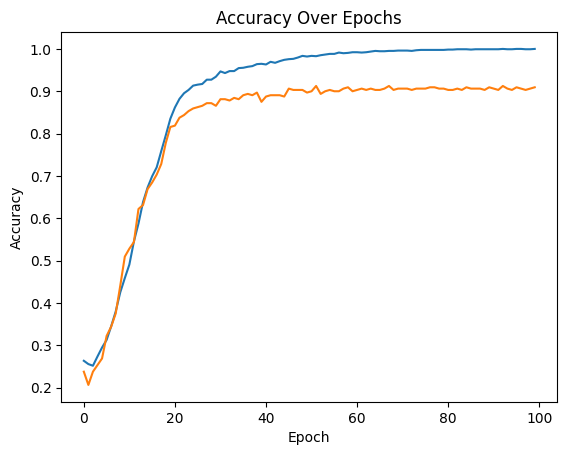

In [206]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


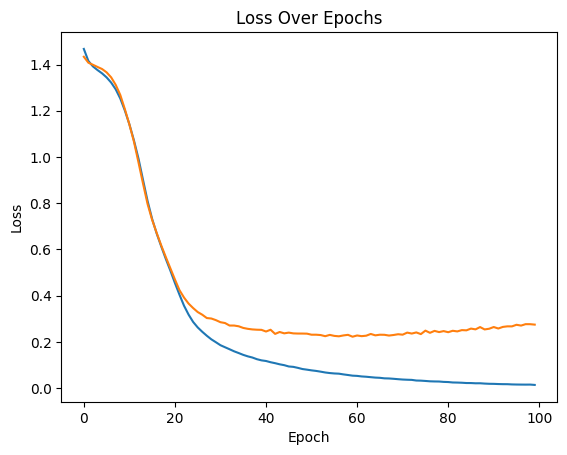

In [207]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [208]:
from tensorflow.keras.optimizers import Adam
# Function to build and train model
def train_model_with_lr(learning_rate):
    model = Sequential()
    model.add(Dense(16, input_shape=(n_features,), activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=50,
    verbose=1
)



Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.9094 - val_loss: 0.2737
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0124 - val_accuracy: 0.9062 - val_loss: 0.2743
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.9094 - val_loss: 0.2832
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.9031 - val_loss: 0.2759
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9031 - val_loss: 0.2842
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9094 - val_loss: 0.2857
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9031 - val_loss: 0.2839
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.9000 - v

In [209]:
#Evaluate the model
loss,acc=model.evaluate(X_test,y_test)
print('Test Accuracy:%3f'%acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9169 - loss: 0.3527 
Test Accuracy:0.912500


# **After hyperparameter tuning, we achieved a test accuracy of 91.25%**

VISUALIZATION AFTER HYPERPARAMETER TUNING

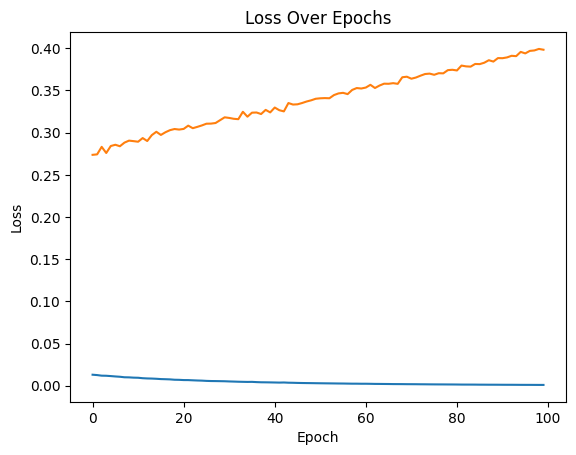

In [212]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Text(0, 0.5, 'Accuracy')

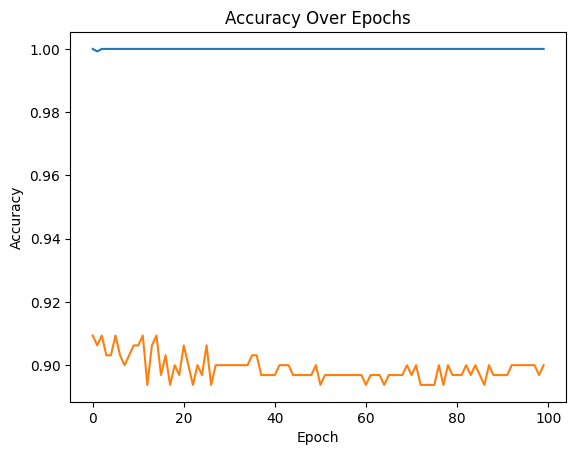

In [213]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')